# Get data

## Request 1 year - last version with Broadcast filter

In [1]:
start_date = '2019-01-01'
end_date = '2020-01-01'

query = f"""SELECT *
FROM
(
    SELECT a_annonce.idannonce, cp, dt_crea, latitude, longitude, idtypebien, idtypetransaction, ville, codeinsee, descriptif_fr
    FROM
    (
        SELECT idannonce, descriptif_fr, cp, dt_crea,latitude, longitude, year, month, day, idtypebien, 
        idtypetransaction, idunivers_bo, ville, codeinsee, adresse,
        CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP) datemaj
        FROM immobc.annonce_revision
) a_annonce

INNER JOIN 
(
    SELECT idannonce,
    MAX(CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)) datemaj
    FROM 
    immobc.annonce_revision
    WHERE 
    CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)
    <timestamp '{end_date}'
    AND CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)
    >timestamp '{start_date}'
    GROUP BY idannonce
) b_annonce

ON a_annonce.idannonce=b_annonce.idannonce AND a_annonce.datemaj=b_annonce.datemaj 

WHERE 
CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)
<timestamp '{end_date}'
AND
CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)
>timestamp '{start_date}'
AND
a_annonce.idunivers_bo=1
AND
a_annonce.idtypebien IN (1, 2)
AND
a_annonce.idtypetransaction IN (1, 2, 7, 8)
) annonce_update

INNER JOIN

(SELECT a_vente.idannonce, px
FROM
(
    SELECT union_vente.idannonce, union_vente.px, year, month,day,
    CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP) datemaj
    FROM 
    (
        (SELECT idannonce, px, year, month, day FROM immobc.atvente_revision)
        UNION
        (SELECT idannonce, px, year, month, day FROM immobc.atventeprestige_revision)
    ) union_vente

) a_vente

INNER JOIN 
(
    SELECT idannonce,
    MAX(CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)) datemaj
    FROM 
    (
        (SELECT idannonce, px, year, month, day FROM immobc.atvente_revision)
        UNION
        (SELECT idannonce, px, year, month, day FROM immobc.atventeprestige_revision)
    )
    WHERE 
    CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)
    <timestamp '{end_date}'
    AND CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)
    >timestamp '{start_date}'
    GROUP BY idannonce
) b_vente 

ON a_vente.idannonce=b_vente.idannonce AND a_vente.datemaj=b_vente.datemaj 

WHERE 
CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)
<timestamp '{end_date}'
AND CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)
>timestamp '{start_date}'

) vente

ON annonce_update.idannonce = vente.idannonce

INNER JOIN

(SELECT a_appartement.idannonce, a_appartement.surface, a_appartement.annee_construct, a_appartement.nb_pieces,a_appartement.nb_chambres

FROM
(
    SELECT abappartement_revision.idannonce, abappartement_revision.surface, annee_construct, year, month, day,
    nb_pieces, nb_chambres, CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP) datemaj 
    FROM 
    immobc.abappartement_revision

) a_appartement

INNER JOIN (
    SELECT 
    idannonce,
    MAX(CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)) datemaj
    FROM 
    immobc.abappartement_revision
    WHERE 
    CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)
    <timestamp '{end_date}'
    AND CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)
    >timestamp '{start_date}'
    GROUP BY idannonce
) b_appartement

ON a_appartement.idannonce=b_appartement.idannonce AND a_appartement.datemaj=b_appartement.datemaj 

WHERE 
CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)
<timestamp '{end_date}'
AND CAST(from_iso8601_timestamp(CONCAT(CAST(year AS VARCHAR),'-',LPAD(CAST(month AS VARCHAR),2,'0'),'-',LPAD(CAST(day AS VARCHAR),2,'0'))) AS TIMESTAMP)
>timestamp '{start_date}'
) appartement

ON annonce_update.idannonce = appartement.idannonce

INNER JOIN

(
SELECT idannonce
FROM predata.annonce
WHERE sisl=1
AND sibd = 0
AND sipp = 0
AND sisln = 0
AND siwebimm = 0
AND sicmi = 0
AND sibucom = 0
AND sicoex = 0 
AND siis = 0 
AND siagb = 0) predata
ON predata.idannonce=annonce_update.idannonce

"""

### Query on Athena

In [2]:
from common_tools.aws.athena import AthenaClient, ATHENA_S3_PROD_BUCKET, ATHENA_PROD_SECRET_ID
athena_client = AthenaClient(s3_bucket=ATHENA_S3_PROD_BUCKET, secret_id=ATHENA_PROD_SECRET_ID)
task = athena_client.query(query)
athena_client.wait_for_completion()
data_request = athena_client.get_task_result(task)

In [10]:
# Get on the TMP
#data_request = pd.read_csv('/tmp/e36a9a63-e0ca-46eb-8ff8-4a3737eda25d.csv')

### Write the Athena Query in txt and put on S3

In [9]:
with open('/home/ubuntu/workspace/data/data_history_20200220.txt', 'w') as f:
    f.write(query)

In [11]:
from common_tools.aws.s3 import S3Client
s3_client = S3Client()
s3_client.upload_file('/home/ubuntu/workspace/data/data_history_20200220.txt','seloger-data-developers-dev','alaborde/data/data_query_20200220_query.txt')

### Put the results of Athena query on S3

In [12]:
from common_tools.aws.s3 import S3Client
s3_client = S3Client()
s3_client.upload_file('/tmp/28b18bc5-45b0-4055-85a8-1cbe0897ec90.csv','seloger-data-developers-dev','alaborde/data/data_query_20200220.csv')

## Retrieve the data from S3

In [1]:
from common_tools.aws.s3 import S3Client
import pandas as pd 
s3_client = S3Client()
data_path = s3_client.download_file('seloger-data-developers-dev','alaborde/data/data_query_20200220.csv')
data = pd.read_csv(data_path)

## Retrieve the ref_geo from S3

In [3]:
from common_tools.aws.s3 import S3Client
import pandas as pd
s3_client = S3Client()
ref_geo_path = s3_client.download_file('seloger-data-developers-dev','alaborde/data/ref_geo.csv')
ref_geo = pd.read_csv(ref_geo_path)

/home/ubuntu/.virtualenvs/dedup/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,6,8,9,10,11,13,14,61,74,95,101,102,103,104,106,109,113,114,115,116,117,120,121,122,123,124) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Prepare data

In [11]:
data_prep = data[['idannonce','cp','ville','codeinsee','descriptif_fr',
             'px', 'surface','annee_construct','nb_pieces', 'latitude', 'longitude']].copy()

## Ads localization

### Geo mapper CP --> City

In [53]:
key_city = ['city_name','city_id','city_code_insee_sl']
geomap_cp = ref_geo.drop_duplicates(subset=key_city).dropna(subset=key_city)[key_city]
geomap_cp = geomap_cp.rename(columns={'city_code_insee_sl': 'codeinsee'})

In [21]:
data_prep_code_insee = data_prep.merge(geomap_cp, how='left',on=['codeinsee'])
data_prep_code_insee = data_prep_code_insee.rename(columns={
    "city_name": "city_name_by_code_insee",
    "city_id": 'city_id_by_code_insee'
})

### Project in Polygon

In [28]:
import sys
sys.path.append('/home/ubuntu/workspace/sl_data-science-models/pricemap/src/')
sys.path.append('/home/ubuntu/workspace/sl_data-science-models/priceml/src/')
from pricemap.localization.looker import PolygonLookup
from pricemap.localization.utils import looker_dict
from pricemap.filter.filters import lat_long_filter

iris_dict, _, _ = looker_dict(ref_geo)
iris_lookup = PolygonLookup(iris_dict)

In [ ]:
def localize(df: pd.DataFrame,
             looker_iris: PolygonLookup,
             ref_geo: pd.DataFrame) -> pd.DataFrame:
    df_to_localize = df.copy()
    df_to_localize.index.name = 'index'
    geo_map_iris, _, geo_map_city = build_geo_mapper(ref_geo)
    # Get dataframe with lat/lon information
    df_with_latlon = df_to_localize.dropna(subset=['latitude', 'longitude']).copy()

    # Look at the IRIS level
    iris_id_from_latlon = looker_iris.lookup(df_with_latlon[['latitude', 'longitude']])
    # Get projection table iris_id => dataframe index
    index_to_id_iris = iris_id_from_latlon.to_frame().dropna()
    index_to_id_iris.columns = ['iris_id']
    index_to_id_iris.index.name = 'index'
    # Merge dataframe with district id
    dataframe_with_idiris = df_to_localize.merge(index_to_id_iris, how='right', on='index')
    # And add the geo info
    geo_map_iris['iris_id'] = geo_map_iris['iris_id'].astype(int)
    dataframe_with_idiris = dataframe_with_idiris.merge(geo_map_iris, how='left', on='iris_id')
    return dataframe_with_idiris

In [ ]:
data_prep_code_insee_filt = lat_long_filter(data_prep_code_insee, 'latitude', 'longitude', False)
data_loc = localize(data_prep_code_insee_filt, iris_lookup, ref_geo)

In [57]:
geomap_cp_bis = geomap_cp.rename(columns={"codeinsee": "city_code_insee_sl",
                                         'city_id': 'city_id_from_latlon'})
data_loc = data_loc.merge(geomap_cp_bis, how='left', on=['city_code_insee_sl'])

,city_name,city_id_from_latlon,city_code_insee_sl
0,Égriselles-le-Bocage,37669,890151
1,Épineau-les-Voves,37670,890152
2,Épineuil,37671,890153
3,Escamps,37672,890154
4,Escolives-Sainte-Camille,37673,890155
...,...,...,...
106269,Civry sur Serein,37628,890110
106273,Commissey,37632,890114
106280,Courceaux,37639,890121
106291,Dilo,37658,890140


In [61]:
data_localized = pd.concat([data_loc, data_prep_code_insee_filt], sort=False).drop_duplicates(subset=['idannonce'], keep='first')

In [85]:
districts_mapper = ref_geo.dropna(subset=['districts_id','districts_name']).drop_duplicates(subset=['districts_id','districts_name'])
districts_mapper = districts_mapper[['districts_id','districts_name']].copy()

In [92]:
data_localized_keep = data_localized[(data_localized['city_id_by_code_insee'] ==data_localized['city_id_from_latlon'])
              | (data_localized['city_id_from_latlon'].isna())]
data_localized_keep = data_localized_keep.merge(districts_mapper, how='left', on=['districts_id'])
data_localized_keep = data_localized_keep.drop(columns=['city_name', 'city_id_from_latlon','iris_id',
                                                       'department_id','region_id','country_id'])
data_loc = data_localized_keep.rename(columns={
    "city_name_by_code_insee": 'city_name',
    'city_id_by_code_insee': 'city_id',
    
}).copy()

## Save it locally

In [96]:
import pickle
with open('/home/ubuntu/workspace/data/request_ads_2019_2020_iris_localized.pickle','wb') as handle:
    pickle.dump(data_loc, handle)

# Load it locally

In [ ]:
import pickle
with open('/home/ubuntu/workspace/data/request_ads_2019_2020_iris_localized.pickle','rb') as handle:
    data_loc = pickle.load(handle)

In [100]:
data_loc.columns

Index(['idannonce', 'cp', 'ville', 'codeinsee', 'descriptif_fr', 'px',
       'surface', 'annee_construct', 'nb_pieces', 'latitude', 'longitude',
       'city_name', 'city_id', 'districts_id', 'city_code_insee_sl',
       'districts_name'],
      dtype='object')

## Focus on Montpellier area

In [97]:
# Get department id
ref_geo[ref_geo.department_name=='Hérault'].dropna(subset=['department_id']).drop_duplicates('department_name')\
[['department_id','department_name']]

,department_id,department_name
12488,297,Hérault


In [98]:
# Get bordering cities
list_id_bordering_montpellier = eval(ref_geo[ref_geo.city_name=='Montpellier'].dropna(subset=['city_id']).drop_duplicates('city_id')\
['city_bordering'].values[0])
list_id_montpellier = list_id_bordering_montpellier + list(ref_geo[ref_geo.city_name=='Montpellier'].dropna(subset=['city_id']).drop_duplicates('city_id')\
[['city_id']].values[0])
list_id_montpellier

[14512,
 14532,
 14571,
 14578,
 14584,
 14589,
 14609,
 14624,
 14695,
 14702,
 14725,
 14627]

In [107]:
# Filter in Montpellier
df_montpellier = data_loc[data_loc.city_id.isin(list_id_montpellier)].copy()
f'{df_montpellier.shape[0]} ads for Montpellier area'

'1938 ads for Montpellier area'

## Focus on Grenoble area

In [111]:
# Get bordering cities
list_id_bordering_grenoble= eval(ref_geo[ref_geo.city_name=='Grenoble'].dropna(subset=['city_id']).drop_duplicates('city_id')\
['city_bordering'].values[0])
list_id_grenoble = list_id_bordering_grenoble + list(ref_geo[ref_geo.city_name=='Grenoble'].dropna(subset=['city_id']).drop_duplicates('city_id')\
[['city_id']].values[0])
list_id_grenoble

[15838, 15845, 15854, 16058, 16096, 16098, 16146, 16155, 16156, 16182, 15869]

In [112]:
# Filter in Grenoble
df_grenoble = data_loc[data_loc.city_id.isin(list_id_grenoble)].copy()
f'{df_grenoble.shape[0]} ads for Grenoble area'

'882 ads for Grenoble area'

## Focus on Paris

In [113]:
# Get bordering cities
list_id_bordering_paris18 = eval(ref_geo[ref_geo.city_name=='Paris 18ème'].dropna(subset=['city_id']).drop_duplicates('city_id')\
['city_bordering'].values[0])
list_id_paris18 = list_id_bordering_paris18 + list(ref_geo[ref_geo.city_name=='Paris 18ème'].dropna(subset=['city_id']).drop_duplicates('city_id')\
[['city_id']].values[0])
list_id_paris18

[32588, 32589, 32590, 32597, 32599, 38348, 38379, 38380, 32598]

In [119]:
# Filter in Paris 18eme
df_paris18 = data_loc[data_loc.city_id.isin(list_id_paris18)].copy()
f'{df_paris18.shape[0]} ads for Paris 18eme area'

'968 ads for Paris 18eme area'

# Gold set

In [121]:
goldset = pd.concat([df_paris18, df_grenoble, df_montpellier], sort=False)

(3788, 16)

## Export goldset

In [123]:
goldset.to_csv('/home/ubuntu/workspace/data/dedup_goldset.csv', index=False)

# Filter gold set for dedup

In [ ]:
import pandas as pd
goldset = pd.read_csv('/home/ubuntu/workspace/data/dedup_goldset.csv')

## Remove ads with the same descriptif (only same descriptif, no need for a same CP)

In [124]:
from pricemap.filter.filters import simple_text
df_goldset_simpletxt = simple_text(goldset, 'descriptif_fr')

In [125]:
df_goldset_dropsamedesc = df_goldset_simpletxt.drop_duplicates(subset=['descriptif_fr'])

In [127]:
print(f'{df_goldset_simpletxt.shape[0]} before, {df_goldset_dropsamedesc.shape[0]} now')

3788 before, 3679 now


## Remove ads for new estates

In [128]:
from pricemap.filter.filters import text_black_list

new_keywords = [u"programme neuf",u"livre fini",u"travaux finis",u"promoteur"]
df_goldset_blacklist = text_black_list(df_goldset_dropsamedesc, 'descriptif_fr', new_keywords)

In [130]:
print(f'{df_goldset_dropsamedesc.shape[0]} before, {df_goldset_blacklist.shape[0]} now')

3679 before, 3643 now


In [132]:
data_goldset = df_goldset_blacklist.copy()

# Find similar ads

## Geographic groups

In [143]:
# Group ads that are around the three targeted area
# Method: project in ref geo to get the department and group the ads
group_mapper= ['city_id','region_id']
depart_mapper = ref_geo.drop_duplicates(subset=group_mapper).dropna(subset=group_mapper)[group_mapper]

In [144]:
data_goldset_depart_code = data_goldset.merge(depart_mapper, how='left', on=['city_id'])
data_goldset_depart_code.region_id.value_counts()                      

240    1848
239     924
252     871
Name: region_id, dtype: int64

## Rules on descriptive fields

### Price

In [147]:
# Delta price of 5%
delta_price = 5
# Create max and min bound for each price
data_goldset_depart_code['min_px'] = data_goldset_depart_code.px*0.95
data_goldset_depart_code['max_px'] = data_goldset_depart_code.px*1.05


In [153]:
# Test for ads of one group how many ads we get like this
data_test = data_goldset_depart_code[data_goldset_depart_code.region_id == 240].copy()
data_test

,idannonce,cp,ville,codeinsee,descriptif_fr,px,surface,annee_construct,nb_pieces,latitude,longitude,city_name,city_id,districts_id,city_code_insee_sl,districts_name,region_id,min_px,max_px
1795,153882117,34000,Montpellier,340172.0,pres d arenes t de m a deux pas du centre hist...,196000.0,49.00,NaN,2.0,43.604727,3.901175,Montpellier,14627.0,41332.0,340172.0,Port Marianne,240,186200.0,205800.0
1796,137167811,34000,Montpellier,340172.0,au premier etage d une residence securisee t d...,138112.0,46.00,NaN,2.0,43.604727,3.901175,Montpellier,14627.0,41332.0,340172.0,Port Marianne,240,131206.4,145017.6
1797,153356669,34000,Montpellier,340172.0,herault a vendre a montpellier dans le secteur...,229000.0,106.00,1970.0,4.0,43.604727,3.901175,Montpellier,14627.0,41332.0,340172.0,Port Marianne,240,217550.0,240450.0
1798,154506007,34000,Montpellier,340172.0,appartement d exception dans residence haut de...,650000.0,93.00,NaN,4.0,43.604727,3.901175,Montpellier,14627.0,41332.0,340172.0,Port Marianne,240,617500.0,682500.0
1799,153597569,34430,Saint Jean de Vedas,340270.0,st jean de vedas proche de l a de la station d...,399000.0,110.00,2018.0,4.0,43.568759,3.829911,Saint-Jean-de-Védas,14725.0,41370.0,340270.0,Sud,240,379050.0,418950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,145563443,34070,Montpellier,340172.0,pres d arenes montpellier sud idealement situe...,140400.0,78.00,NaN,4.0,NaN,NaN,Montpellier,14627.0,NaN,NaN,NaN,240,133380.0,147420.0
3639,151811025,34080,Montpellier,340172.0,vente appartement montpellier au sein du nouve...,149500.0,61.61,NaN,3.0,NaN,NaN,Montpellier,14627.0,NaN,NaN,NaN,240,142025.0,156975.0
3640,151127637,34070,Montpellier,340172.0,montpellier dans residence recente joli f de m...,108000.0,33.27,NaN,1.0,NaN,NaN,Montpellier,14627.0,NaN,NaN,NaN,240,102600.0,113400.0
3641,153508507,34000,Montpellier,340172.0,exclusivite centre ville secteur pont juvenal ...,265000.0,95.00,NaN,4.0,NaN,NaN,Montpellier,14627.0,NaN,NaN,NaN,240,251750.0,278250.0


In [165]:
price_matrix= np.zeros((data_test.shape[0], data_test.shape[0]))
for i in range(data_test.shape[0]):
    id_groups = np.where((data_test.px >= data_test.iloc[i]['min_px']) & (data_test.px <= data_test.iloc[i]['max_px']))
    price_matrix[i, id_groups] = 1

<IPython.core.display.Javascript object>


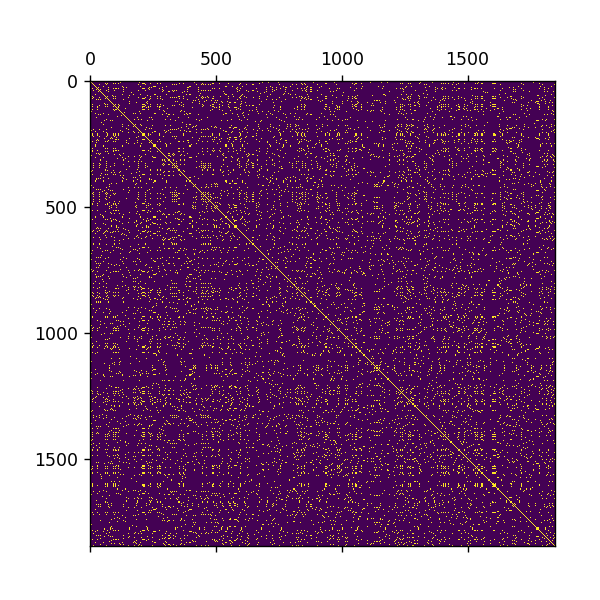

In [167]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.matshow(price_matrix)

### Surface

In [174]:
# Delta price of 5%
delta_surface = 5
# Create max and min bound for each price
data_goldset_depart_code['min_surface'] = data_goldset_depart_code.surface*(1-delta_surface/100)
data_goldset_depart_code['max_surface'] = data_goldset_depart_code.surface*(1+delta_surface/100)

# Test for ads of one group how many ads we get like this
data_test = data_goldset_depart_code[data_goldset_depart_code.region_id == 240].copy()

In [175]:
surface_matrix= np.zeros((data_test.shape[0], data_test.shape[0]))
for i in range(data_test.shape[0]):
    id_groups = np.where((data_test.surface >= data_test.iloc[i]['min_surface']) & (data_test.surface <= data_test.iloc[i]['max_surface']))
    surface_matrix[i, id_groups] = 1

<IPython.core.display.Javascript object>


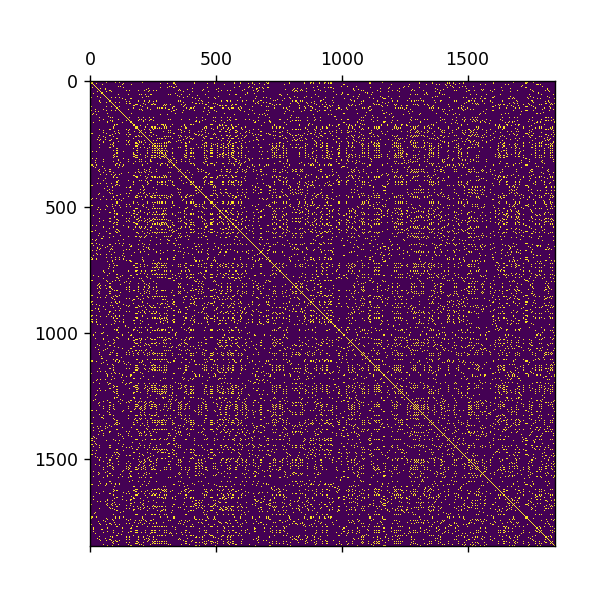

In [176]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.matshow(surface_matrix)

### Nb pieces

In [216]:
# Delta price of 5%
delta_nbpiece = 1
# Create max and min bound for each price
data_goldset_depart_code['min_nbpiece'] = data_goldset_depart_code.nb_pieces-delta_nbpiece
data_goldset_depart_code['max_nbpiece'] = data_goldset_depart_code.nb_pieces+delta_nbpiece

# Test for ads of one group how many ads we get like this
data_test = data_goldset_depart_code[data_goldset_depart_code.region_id == 240].copy()

In [192]:
piece_matrix= np.zeros((data_test.shape[0], data_test.shape[0]))
for i in range(data_test.shape[0]):
    id_groups = np.where((data_test.nb_pieces >= data_test.iloc[i]['min_nbpiece']) & (data_test.nb_pieces <= data_test.iloc[i]['max_nbpiece']))
    piece_matrix[i, id_groups] = 1

<IPython.core.display.Javascript object>


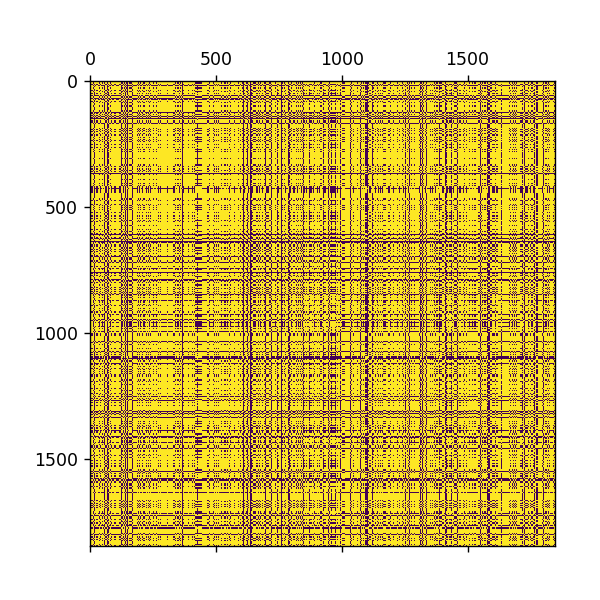

In [193]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.matshow(piece_matrix)

### Combine Price/Surface/Nb Pieces

In [195]:
combined_matrix = np.multiply(np.multiply(piece_matrix, surface_matrix), price_matrix)

<IPython.core.display.Javascript object>


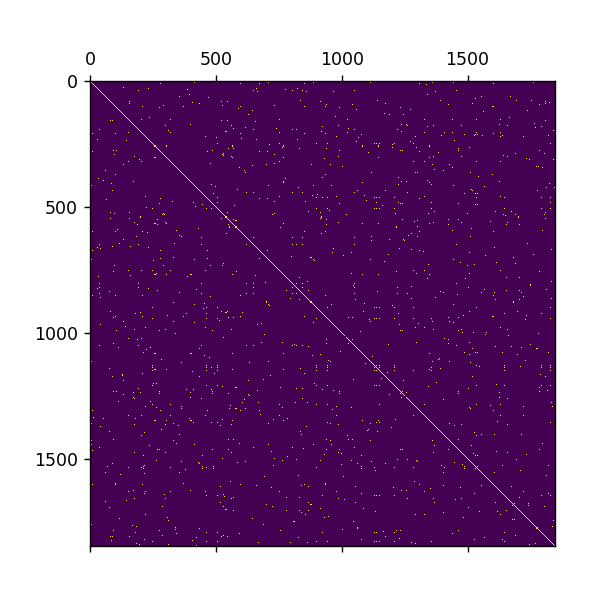

In [196]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.matshow(combined_matrix)

In [231]:
data_test['groups'] = 'nan'
data_test['len_group'] = 0
# Get groups
for i in range(combined_matrix.shape[0]):
    index_list = data_test.index[np.where(combined_matrix[i,:])[0].tolist()].tolist()
    get_index = data_test.index[i]
    if get_index in index_list:
        index_list.remove(get_index)
    id_annoncegroup = data_test.loc[index_list]['idannonce'].values.tolist()
    data_test.at[get_index, 'groups'] = str(id_annoncegroup)
    data_test.at[get_index, 'len_group'] = len(id_annoncegroup)
    

In [236]:
data_test[(data_test.len_group>5) & (data_test.len_group<10)].shape

(312, 25)

In [246]:
def group_function(df, delta_price, delta_surface, delta_piece):
    # Delta price of 5%
    # Create max and min bound for each price
    df['min_px'] = df.px*0.95
    df['max_px'] = df.px*1.05
    
    # Create max and min bound for each price
    df['min_surface'] = df.surface*(1-delta_surface/100)
    df['max_surface'] = df.surface*(1+delta_surface/100)

    df['min_nbpiece'] = df.nb_pieces-delta_nbpiece
    df['max_nbpiece'] = df.nb_pieces+delta_nbpiece
    
    piece_matrix= np.zeros((df.shape[0], df.shape[0]))
    surface_matrix= np.zeros((df.shape[0], df.shape[0]))
    price_matrix= np.zeros((df.shape[0], df.shape[0]))
    
    for i in range(df.shape[0]):
        id_groups = np.where((df.nb_pieces >= df.iloc[i]['min_nbpiece']) & (df.nb_pieces <= df.iloc[i]['max_nbpiece']))
        piece_matrix[i, id_groups] = 1
        id_groups = np.where((df.surface >= df.iloc[i]['min_surface']) & (df.surface <= df.iloc[i]['max_surface']))
        surface_matrix[i, id_groups] = 1
        id_groups = np.where((df.px >= df.iloc[i]['min_px']) & (df.px <= df.iloc[i]['max_px']))
        price_matrix[i, id_groups] = 1
    
    combined_matrix = np.multiply(np.multiply(piece_matrix, surface_matrix), price_matrix)
    df['groups'] = 'nan'
    df['len_group'] = 0
    # Get groups
    for i in range(combined_matrix.shape[0]):
        index_list = df.index[np.where(combined_matrix[i,:])[0].tolist()].tolist()
        get_index = df.index[i]
        if get_index in index_list:
            index_list.remove(get_index)
        id_annoncegroup = df.loc[index_list]['idannonce'].values.tolist()
        df.at[get_index, 'groups'] = str(id_annoncegroup)
        df.at[get_index, 'len_group'] = len(id_annoncegroup)
    return df
    

In [240]:
df_montpellier = data_goldset_depart_code[data_goldset_depart_code.region_id == 240].copy()
df_paris18 = data_goldset_depart_code[data_goldset_depart_code.region_id == 239].copy()
df_grenoble= data_goldset_depart_code[data_goldset_depart_code.region_id == 252].copy()

In [247]:
delta_price = 5
delta_surface = 5
delta_piece = 1

groupped_montpellier = group_function(df_montpellier, delta_price, delta_surface, delta_piece)
groupped_paris18 = group_function(df_paris18, delta_price, delta_surface, delta_piece)
groupped_grenoble = group_function(df_grenoble, delta_price, delta_surface, delta_piece)

In [250]:
groupped_paris18[(groupped_paris18.len_group >= 4) & (groupped_paris18.len_group <= 8)].shape

(226, 25)

In [260]:
def get_group_list(df, min_len, max_len):
    df_filtered = df[(df.len_group >= min_len) & (df.len_group <= max_len)].copy()
    list_group = []
    for _, row in df_filtered.iterrows():
        group = [row.idannonce] + eval(row.groups)
        list_group.append(group)
    return list_group
    

In [273]:
# Groups on Paris
list_of_groups = get_group_list(groupped_paris18, 4, 8)
list_idannonce_flat = [item for sublist in list_of_groups for item in sublist]
list_ids_paris = list(set(list_idannonce_flat))
f'{len(list_ids_paris)} idannonce in Paris'

'400 idannonce in Paris'

In [272]:
# Groups on Motnpellier
list_of_groups = get_group_list(groupped_montpellier, 4, 8)
list_idannonce_flat = [item for sublist in list_of_groups for item in sublist]
list_ids_montpellier = list(set(list_idannonce_flat))
f'{len(list_ids_montpellier)} idannonce in Montpellier'

'874 idannonce in Montpellier'

In [271]:
# Groups on Motnpellier
list_of_groups = get_group_list(groupped_grenoble, 4, 8)
list_idannonce_flat = [item for sublist in list_of_groups for item in sublist]
list_ids_grenoble = list(set(list_idannonce_flat))
f'{len(list_ids_grenoble)} idannonce in Grenoble'

'510 idannonce in Grenoble'

In [277]:
list_ids_annotation = list_ids_paris + list_ids_montpellier + list_ids_grenoble
len(list_ids_annotation)

1784

In [283]:
import json
with open('/home/ubuntu/workspace/data/dedup_gold_set/idannonce_dedup.json', 'w') as handle:
    json.dump(list_ids_annotation, handle)

In [278]:
groups_goldataset = pd.concat([groupped_grenoble, groupped_montpellier, groupped_paris18], sort=False)

In [295]:
groupped_paris18.len_group.describe()

count    924.000000
mean       3.012987
std        3.058095
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       14.000000
Name: len_group, dtype: float64

In [292]:
groups_goldataset.len_group.describe()

count    3643.000000
mean        8.829536
std         8.999133
min         0.000000
25%         2.000000
50%         6.000000
75%        13.000000
max        55.000000
Name: len_group, dtype: float64

In [281]:
groups_goldataset.to_csv('/home/ubuntu/workspace/data/dedup_gold_set/goldset_dedup_grouped.csv', index=False)

In [285]:
groupped_paris18.city_name.value_counts()

Paris 18ème      212
Paris 17ème      144
Paris 8ème       116
Paris 10ème      112
Paris 19ème       94
Saint-Denis       72
Paris 9ème        64
Saint-Ouen        60
Aubervilliers     50
Name: city_name, dtype: int64

In [290]:
190_000*1.05

199500.0

# Check image access

In [6]:
import json
with open('/home/ubuntu/workspace/data/dedup_gold_set/idannonce_dedup.json', 'r') as handle:
    selected_id_annonce = json.load(handle)

In [9]:
import pandas as pd
id_photo = pd.read_excel('/home/ubuntu/workspace/data/dedup_gold_set/visuels_Nico.xlsx')

In [ ]:
id_photo

# Archives

In [183]:
interest_column = ['surface','nb_pieces','nb_chambres','px','latitude','longitude']
# Select only columns of interest
df_montpellier_data = df_montpellier_blacklist[interest_column]
# Remove NaN
df_montpellier_data_no_nan = df_montpellier_data.dropna(axis=0)


In [184]:
df_montpellier_data_no_nan

,surface,nb_pieces,nb_chambres,px,latitude,longitude
126,38.0,2.0,1.0,108000.0,43.599732,3.866739
273,69.0,3.0,2.0,326000.0,43.566700,3.900000
341,25.0,1.0,0.0,89000.0,43.634868,3.860440
353,64.0,3.0,2.0,199900.0,43.590058,3.856543
422,35.0,2.0,1.0,137000.0,43.604727,3.901175
...,...,...,...,...,...,...
1018079,48.0,2.0,1.0,190000.0,43.568759,3.829911
1018148,59.0,3.0,2.0,200000.0,43.606750,3.895250
1018149,84.0,4.0,3.0,174900.0,43.593782,3.871663
1018154,65.0,3.0,2.0,261500.0,43.657694,3.889003


## Euclidian distance

In [185]:
from sklearn.metrics.pairwise import euclidean_distances
euclidian_dist = euclidean_distances(df_montpellier_data_no_nan.values, df_montpellier_data_no_nan.values)
np.fill_diagonal(euclidian_dist, np.NaN)

## Check ads with a null distance for columns of interest

In [186]:
# Get ads index for which there is a null euclidian distance
ad_index_1, ad_index_2 = np.where(euclidian_dist==0)

In [187]:
# Index to Id Annonce
ad_id_1 = df_montpellier.loc[df_montpellier_data_no_nan.iloc[ad_index_1].index].idannonce
ad_id_2 = df_montpellier.loc[df_montpellier_data_no_nan.iloc[ad_index_2].index].idannonce

In [188]:
similar_ads = np.array([ad_id_1, ad_id_2]).transpose()
df_similar_ads = pd.DataFrame(similar_ads)
df_similar_ads.columns = ['idannonce_1', 'idannonce_2']

In [190]:
df_group_list = df_similar_ads.groupby('idannonce_1')['idannonce_2'].apply(list).reset_index()

In [191]:
df_group_list['idannonce_1'] = df_group_list['idannonce_1'].apply(lambda x: [x])
df_group_list['combined'] = df_group_list.values.tolist()

In [192]:
def ravel_list(l):
    return [item for sublist in l for item in sublist]
df_group_list['groups_similar'] = df_group_list['combined'].apply(ravel_list)
df_group_list['groups_size'] = df_group_list['groups_similar'].apply(lambda x: len(x))

In [193]:
df_group_list[df_group_list['groups_size']>3][['groups_size']].describe()

,groups_size
count,392.000000
mean,5.711735
std,2.092751
min,4.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,12.000000


In [194]:
list_of_groups = df_group_list['groups_similar'] .values
list_of_groups

array([list([97195659, 151349193]), list([99143615, 135213183]),
       list([101259191, 145507535]), ...,
       list([154771641, 152302285, 151509159, 150729655]),
       list([154784659, 148653901, 153900531, 146913845, 147011087]),
       list([154792037, 150942819])], dtype=object)

## Get groups of ID annonce

In [198]:
df_groups = df_group_list.copy()[['groups_similar','groups_size']]
df_groups.groups_size.value_counts()

2     1877
3      544
4      134
5      103
6       69
8       31
12      24
7       21
9        9
10       1
Name: groups_size, dtype: int64

## Volume to export

In [208]:
# CHeck Volume
minimum_number_in_group = 5 
nb_ads = df_groups[df_groups['groups_size']>=minimum_number_in_group].groups_size.sum()
print(f'{nb_ads}')
df_group_filtered = df_groups[df_groups['groups_size']>=minimum_number_in_group]

1703


In [219]:
# Get list of Id Annonce to export
list_idannonce = []
for index, row in df_group_filtered.iterrows():
    for idannonce in row['groups_similar']:
        list_idannonce.append([idannonce, index])
idannonce_table = np.array(list_idannonce)
idannonce_table

array([[116859097,         9],
       [147127791,         9],
       [149335365,         9],
       ...,
       [153900531,      2811],
       [146913845,      2811],
       [147011087,      2811]])

## Check some examples

In [228]:
example = df_groups[df_groups['groups_size']>5].iloc[70]['groups_similar']
example

[144215883, 144074065, 144966523, 147683655, 149508171, 142959539, 142904637]

In [229]:
df_montpellier[df_montpellier.idannonce.isin(example)].sort_values('dt_crea', ascending=False)

,idannonce,cp,dt_crea,latitude,longitude,idtypebien,idtypetransaction,ville,codeinsee,descriptif_fr,...,nb_pieces,nb_chambres,iris_id,districts_id,city_code_insee_sl,department_id,region_id,country_id,codeinsee_,city_with_arrondissements_id
232328,149508171,34000,2019-07-17 21:43:00.000,43.604727,3.901175,1,2,Montpellier,340172.0,montpellier nord proche quartier pere soulas n...,...,2.0,1.0,57142,41332,340172.0,297,240,73,NaN,NaN
191994,147683655,34000,2019-05-29 14:33:00.000,43.604727,3.901175,1,2,Montpellier,340172.0,montpellier nord proche quartier pere soulas n...,...,2.0,1.0,57142,41332,340172.0,297,240,73,NaN,NaN
121929,144966523,34000,2019-03-12 14:39:00.000,43.604727,3.901175,1,2,Montpellier,340172.0,montpellier nord proche quartier pere soulas n...,...,2.0,1.0,57142,41332,340172.0,297,240,73,NaN,NaN
853363,144215883,34000,2019-02-19 15:02:00.000,43.604727,3.901175,1,2,Montpellier,340172.0,montpellier nord proche quartier pere soulas n...,...,2.0,1.0,57142,41332,340172.0,297,240,73,NaN,NaN
81218,144074065,34000,2019-02-14 22:15:00.000,43.604727,3.901175,1,2,Montpellier,340172.0,montpellier nord proche hopitaux facultes dans...,...,2.0,1.0,57142,41332,340172.0,297,240,73,NaN,NaN
401151,142959539,34000,2019-01-14 12:23:00.000,43.604727,3.901175,1,2,Montpellier,340172.0,montpellier nord proche hopitaux facultes dans...,...,2.0,1.0,57142,41332,340172.0,297,240,73,NaN,NaN
432993,142904637,34000,2019-01-11 22:12:00.000,43.604727,3.901175,1,2,Montpellier,340172.0,montpellier nord proche hopitaux facultes et a...,...,2.0,1.0,57142,41332,340172.0,297,240,73,NaN,NaN


In [243]:
a = []
for i in range(100):
    example = df_groups[df_groups['groups_size']>5].iloc[i]['groups_similar']
    ll = df_montpellier[df_montpellier.idannonce.isin(example)].sort_values('dt_crea', ascending=False)
    if ll['dt_crea'].iloc[0] > '2019-12-01':
        a.append(example)

In [244]:
df_montpellier[df_montpellier.idannonce.isin(a[1])].sort_values('dt_crea', ascending=False)

,idannonce,cp,dt_crea,latitude,longitude,idtypebien,idtypetransaction,ville,codeinsee,descriptif_fr,...,nb_pieces,nb_chambres,iris_id,districts_id,city_code_insee_sl,department_id,region_id,country_id,codeinsee_,city_with_arrondissements_id
327316,154506035,34000,2019-12-19 08:59:00.000,43.604727,3.901175,1,8,Montpellier,340172.0,a voir t en etage eleve dans un environnent am...,...,4.0,3.0,57142,41332,340172.0,297,240,73,NaN,NaN
278551,151373051,34000,2019-09-20 22:42:00.000,43.604728,3.901175,1,8,Montpellier,340172.0,dans une residence resolument contemporaine ap...,...,4.0,3.0,57142,41332,340172.0,297,240,73,NaN,NaN
45208,146225235,34000,2019-04-16 14:23:00.000,43.604727,3.901175,1,8,Montpellier,340172.0,dans le tres recherche quartier de port marian...,...,4.0,3.0,57142,41332,340172.0,297,240,73,NaN,NaN
329125,145536249,34000,2019-03-28 14:19:00.000,43.604727,3.901175,1,8,Montpellier,340172.0,une situation privilegiee des plus recherchees...,...,4.0,3.0,57142,41332,340172.0,297,240,73,NaN,NaN
563653,144981229,34000,2019-03-12 20:58:00.000,43.604727,3.901175,1,8,Montpellier,340172.0,tres rare montpellier une situation privilegie...,...,4.0,3.0,57142,41332,340172.0,297,240,73,NaN,NaN
797760,142844309,34000,2019-01-10 14:27:00.000,43.604727,3.901175,1,8,Montpellier,340172.0,dans une nouvelle residence tres moderne super...,...,4.0,3.0,57142,41332,340172.0,297,240,73,NaN,NaN
360274,139496127,34000,2018-10-11 21:02:00.000,43.604727,3.901175,1,8,Montpellier,340172.0,montpellier au coeur du quartier de port maria...,...,4.0,3.0,57142,41332,340172.0,297,240,73,NaN,NaN
483925,139265449,34000,2018-10-06 14:44:00.000,43.604727,3.901175,1,8,Montpellier,340172.0,ce magnifique penthouse de type se situe au co...,...,4.0,3.0,57142,41332,340172.0,297,240,73,NaN,NaN
